In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
x_train = (x_train).astype(np.float32) / 255
x_test = (x_test).astype(np.float32) / 255

# Base model

In [5]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 10)                1003530   
                                                                 
Total params: 1,154,698
Trainable params: 1,154,698
Non-trainable params: 0
_________________________________________________________________


In [6]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/20
500/500 [==============================] - 18s 28ms/step - loss: 1.4553 - accuracy: 0.4859 - val_loss: 1.2513 - val_accuracy: 0.5577
Epoch 2/20
500/500 [==============================] - 13s 27ms/step - loss: 1.1216 - accuracy: 0.6081 - val_loss: 1.0835 - val_accuracy: 0.6221
Epoch 3/20
500/500 [==============================] - 13s 27ms/step - loss: 0.9635 - accuracy: 0.6647 - val_loss: 1.0411 - val_accuracy: 0.6331
Epoch 4/20
500/500 [==============================] - 13s 27ms/step - loss: 0.8573 - accuracy: 0.7044 - val_loss: 1.0228 - val_accuracy: 0.6502
Epoch 5/20
500/500 [==============================] - 14s 27ms/step - loss: 0.7733 - accuracy: 0.7329 - val_loss: 1.0126 - val_accuracy: 0.6565
Epoch 6/20
500/500 [==============================] - 14s 27ms/step - loss: 0.6977 - accuracy: 0.7585 - val_loss: 1.0434 - val_accuracy: 0.6541
Epoch 7/20
500/500 [==============================] - 14s 27ms/step - loss: 0.6286 - accuracy: 0.7844 - val_loss: 1.0757 - val_accuracy:

In [7]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plotting accuracy
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.ylim(0.5, 1) # Setting y-axis limit for accuracy
    plt.yticks(np.arange(0.5, 1.05, 0.05)) # Setting x-ticks from 0.5 to 1.0 with step 0.05
    plt.grid(True)
    plt.show()

    # Plotting loss
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

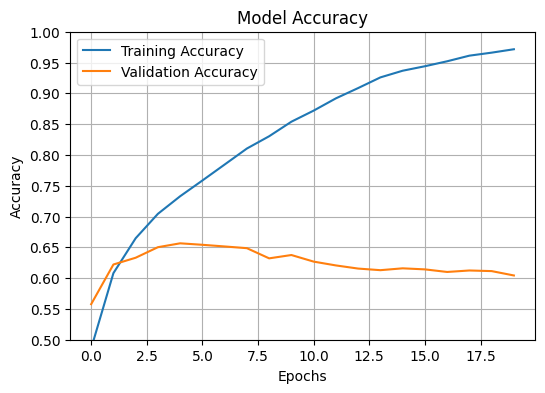

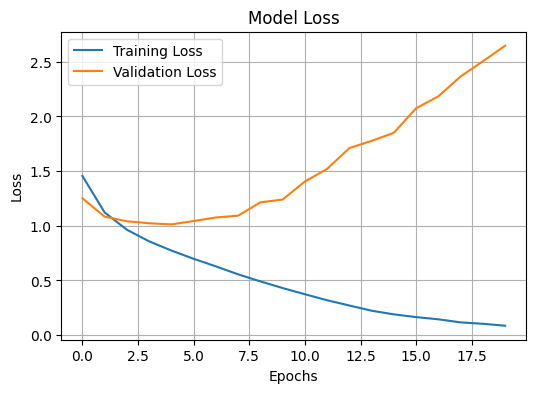

In [8]:
plot_history(history)

# Stride

In [9]:
# define model with stride
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=(2, 2)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=(2, 2)))
model.add(keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       3584      
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                62730     
                                                                 
Total params: 213,898
Trainable params: 213,898
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/20
500/500 [==============================] - 5s 8ms/step - loss: 1.5798 - accuracy: 0.4374 - val_loss: 1.3449 - val_accuracy: 0.5263
Epoch 2/20
500/500 [==============================] - 4s 8ms/step - loss: 1.2627 - accuracy: 0.5553 - val_loss: 1.2104 - val_accuracy: 0.5741
Epoch 3/20
500/500 [==============================] - 4s 8ms/step - loss: 1.1261 - accuracy: 0.6048 - val_loss: 1.1286 - val_accuracy: 0.5981
Epoch 4/20
500/500 [==============================] - 4s 8ms/step - loss: 1.0321 - accuracy: 0.6403 - val_loss: 1.0564 - val_accuracy: 0.6309
Epoch 5/20
500/500 [==============================] - 4s 8ms/step - loss: 0.9554 - accuracy: 0.6674 - val_loss: 1.0198 - val_accuracy: 0.6462
Epoch 6/20
500/500 [==============================] - 4s 8ms/step - loss: 0.9008 - accuracy: 0.6853 - val_loss: 1.0326 - val_accuracy: 0.6352
Epoch 7/20
500/500 [==============================] - 4s 8ms/step - loss: 0.8407 - accuracy: 0.7089 - val_loss: 1.0112 - val_accuracy: 0.6514
Epoch 

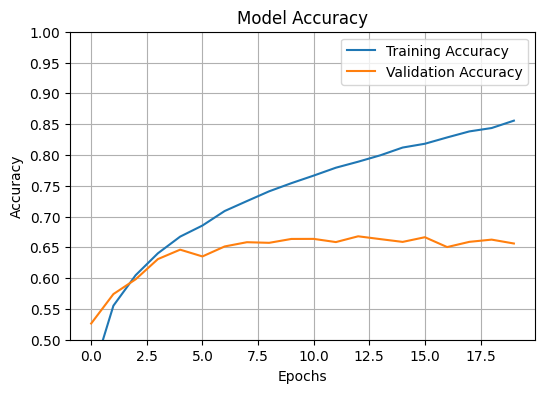

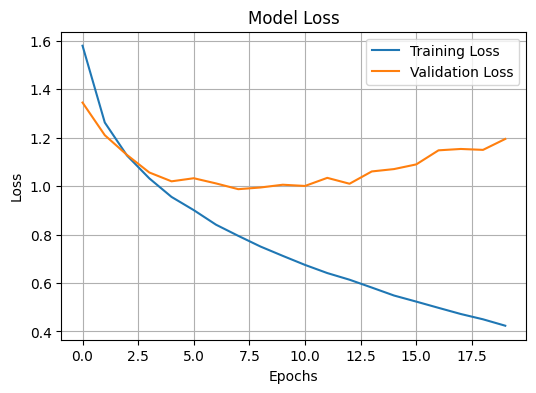

In [11]:
plot_history(history)

# Pooling

In [12]:
# define model with pooling
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [13]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/20
500/500 [==============================] - 7s 14ms/step - loss: 1.4947 - accuracy: 0.4670 - val_loss: 1.2437 - val_accuracy: 0.5655
Epoch 2/20
500/500 [==============================] - 7s 13ms/step - loss: 1.1581 - accuracy: 0.5949 - val_loss: 1.0801 - val_accuracy: 0.6279
Epoch 3/20
500/500 [==============================] - 7s 13ms/step - loss: 1.0125 - accuracy: 0.6509 - val_loss: 1.0030 - val_accuracy: 0.6516
Epoch 4/20
500/500 [==============================] - 7s 13ms/step - loss: 0.9308 - accuracy: 0.6806 - val_loss: 0.9319 - val_accuracy: 0.6802
Epoch 5/20
500/500 [==============================] - 7s 13ms/step - loss: 0.8625 - accuracy: 0.7048 - val_loss: 0.9212 - val_accuracy: 0.6845
Epoch 6/20
500/500 [==============================] - 7s 13ms/step - loss: 0.8087 - accuracy: 0.7214 - val_loss: 0.8859 - val_accuracy: 0.6970
Epoch 7/20
500/500 [==============================] - 7s 13ms/step - loss: 0.7571 - accuracy: 0.7405 - val_loss: 0.9028 - val_accuracy: 0.6898

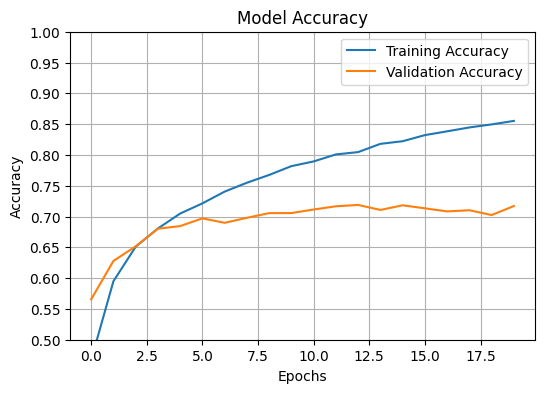

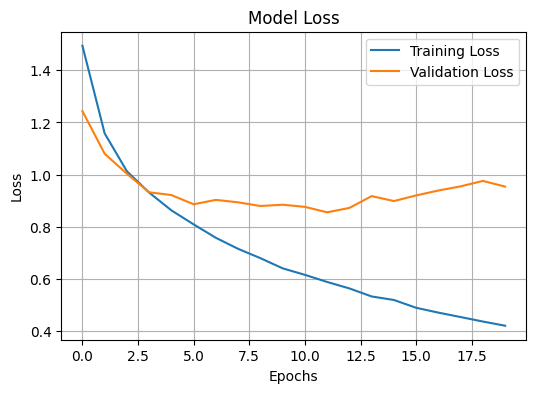

In [14]:
plot_history(history)

313/313 [==============================] - 1s 2ms/step
[[788  17  44  14  14   8   9  12  63  31]
 [ 28 852   6   5   2   7  11   0  24  65]
 [ 82  11 606  38  75  74  49  41  13  11]
 [ 30  14  74 459  82 187  70  53  22   9]
 [ 35   3  84  44 664  37  41  73  15   4]
 [ 17   2  65 117  53 653  27  51   8   7]
 [  9  10  62  44  49  28 773   8   7  10]
 [ 19   4  39  22  43  50  16 795   2  10]
 [ 76  34  12   8   5   9   7   9 816  24]
 [ 34  97  17  12   7   7  11  23  28 764]]
[[0.788 0.017 0.044 0.014 0.014 0.008 0.009 0.012 0.063 0.031]
 [0.028 0.852 0.006 0.005 0.002 0.007 0.011 0.    0.024 0.065]
 [0.082 0.011 0.606 0.038 0.075 0.074 0.049 0.041 0.013 0.011]
 [0.03  0.014 0.074 0.459 0.082 0.187 0.07  0.053 0.022 0.009]
 [0.035 0.003 0.084 0.044 0.664 0.037 0.041 0.073 0.015 0.004]
 [0.017 0.002 0.065 0.117 0.053 0.653 0.027 0.051 0.008 0.007]
 [0.009 0.01  0.062 0.044 0.049 0.028 0.773 0.008 0.007 0.01 ]
 [0.019 0.004 0.039 0.022 0.043 0.05  0.016 0.795 0.002 0.01 ]
 [0.076 0.

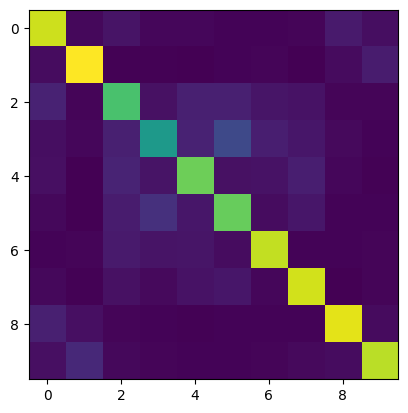

In [15]:
# plot confusion matrix
import sklearn.metrics

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

conf_norm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(conf_norm)
